In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm

font_path = r"C:\Temp\2025\python2\34. 0904\NanumGothic.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rc('font', family=font_prop.get_name())
print("Font name in TTF:", font_prop.get_name())

data = {
    '학번': [2001, 2002, 2003, 2004, 2005],
    '이름': ['홍길동', '김철수', '이영희', '박민수', '최지우'],
    '성별': ['M', 'F', 'F', 'M', 'F'],
    '국어': [85, 90, np.nan, 78, 88],
    '영어': [82, 95, 85, np.nan, 92],
    '수학': [88, 93, 80, 75, 85],
}

df = pd.DataFrame(data)
df

Font name in TTF: NanumGothic


,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.0,82.0,88
1,2002,김철수,F,90.0,95.0,93
2,2003,이영희,F,NaN,85.0,80
3,2004,박민수,M,78.0,NaN,75
4,2005,최지우,F,88.0,92.0,85


In [2]:
df['국어'] = df['국어'].fillna(df['국어'].mean())
df['영어'] = df['영어'].fillna(df['영어'].mean())

In [3]:
df.loc[1,'수학'] = 150
df

,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.00,82.0,88
1,2002,김철수,F,90.00,95.0,150
2,2003,이영희,F,85.25,85.0,80
3,2004,박민수,M,78.00,88.5,75
4,2005,최지우,F,88.00,92.0,85


In [ ]:
# 이상치 처리 공식 활용(IQR : Interquartitle Range, 사분위 범위)
q1 = df['수학'].quantile(0.25)
q3 = df['수학'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df['수학'] = np.where((df['수학'] < lower_bound) | (df['수학'] > upper_bound), df['수학'].mean(), df['수학'])
df

,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.00,82.0,88.0
1,2002,김철수,F,90.00,95.0,95.6
2,2003,이영희,F,85.25,85.0,80.0
3,2004,박민수,M,78.00,88.5,75.0
4,2005,최지우,F,88.00,92.0,85.0


In [5]:
# 이상치 처리 다른 방식 (z-score)
# 표본이 작거나 정규분포를 따르지 않으면 부정확
zscore = (df['수학'] - df['수학'].mean()) / df['수학'].std()
print(zscore,'\nstd :',df['수학'].std())
df['수학'] = np.where((zscore < -3) | (zscore > 3), df['수학'].mean(), df['수학'])
df

0    0.418278
1    1.387457
2   -0.601912
3   -1.239530
4    0.035707
Name: 수학, dtype: float64 
std : 7.8416834927201675


,학번,이름,성별,국어,영어,수학
0,2001,홍길동,M,85.00,82.0,88.0
1,2002,김철수,F,90.00,95.0,95.6
2,2003,이영희,F,85.25,85.0,80.0
3,2004,박민수,M,78.00,88.5,75.0
4,2005,최지우,F,88.00,92.0,85.0


In [6]:
df['성별'] = df['성별'].replace({'M':'남자','F':'여자'})
df

,학번,이름,성별,국어,영어,수학
0,2001,홍길동,남자,85.00,82.0,88.0
1,2002,김철수,여자,90.00,95.0,95.6
2,2003,이영희,여자,85.25,85.0,80.0
3,2004,박민수,남자,78.00,88.5,75.0
4,2005,최지우,여자,88.00,92.0,85.0


In [7]:
df['총점'] = df[['국어','영어','수학']].sum(axis=1)
df['평균'] = round(df['총점'] / 3, 2)
df

,학번,이름,성별,국어,영어,수학,총점,평균
0,2001,홍길동,남자,85.00,82.0,88.0,255.00,85.00
1,2002,김철수,여자,90.00,95.0,95.6,280.60,93.53
2,2003,이영희,여자,85.25,85.0,80.0,250.25,83.42
3,2004,박민수,남자,78.00,88.5,75.0,241.50,80.50
4,2005,최지우,여자,88.00,92.0,85.0,265.00,88.33


In [8]:
# 총점을 기준으로 내림차순
df = df.sort_values(by='총점', ascending=False)
df

,학번,이름,성별,국어,영어,수학,총점,평균
1,2002,김철수,여자,90.00,95.0,95.6,280.60,93.53
4,2005,최지우,여자,88.00,92.0,85.0,265.00,88.33
0,2001,홍길동,남자,85.00,82.0,88.0,255.00,85.00
2,2003,이영희,여자,85.25,85.0,80.0,250.25,83.42
3,2004,박민수,남자,78.00,88.5,75.0,241.50,80.50


In [9]:
# 성별 과목별 점수
df_gender = round(df.groupby('성별')[['국어','영어','수학','평균']].mean(), 2).reset_index()
print('\n성별 평균 점수:')
df_gender


성별 평균 점수:


,성별,국어,영어,수학,평균
0,남자,81.50,85.25,81.50,82.75
1,여자,87.75,90.67,86.87,88.43


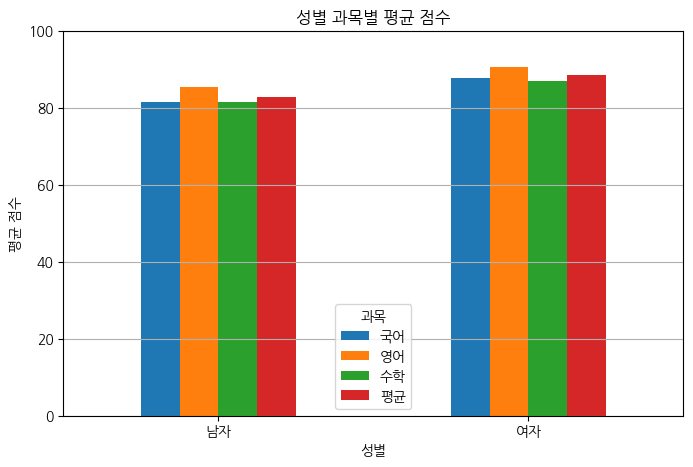

In [ ]:
df_gender.plot(x = '성별', kind = 'bar', figsize=(8,5))
plt.title('성별 과목별 평균 점수')
plt.xlabel('성별')
plt.ylabel('평균 점수')
plt.ylim(0, 100)
plt.legend(title='과목')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.show()